<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/C1Spread1_Prophet_Outlier_removal_maually_Trend_test_with_turn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install prophet

In [83]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

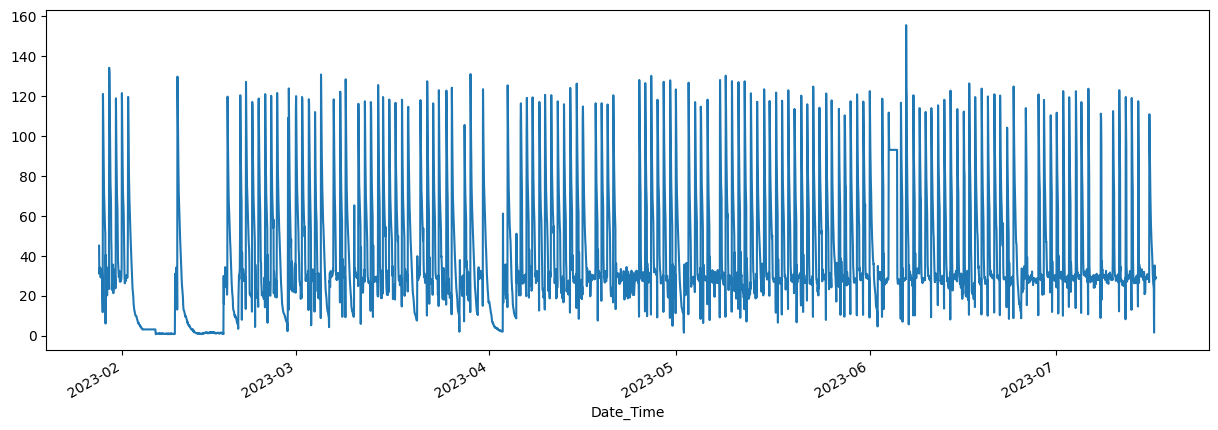

In [84]:
df = pd.read_csv('C1 data from 202302 to 20230716.csv', index_col='Date_Time', parse_dates=True)
df["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [85]:
df_p = df[df['GT Gross MW'] > 190][['Combust Monitor Actual Spread 1']].copy()
df_p['Date_Time'] = df_p.index

In [86]:
df_p.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-01-28 09:10:14,30.969957,2023-01-28 09:10:14
2023-01-28 10:10:14,32.109272,2023-01-28 10:10:14
2023-01-28 11:10:14,34.231709,2023-01-28 11:10:14
2023-01-28 12:10:14,32.847168,2023-01-28 12:10:14
2023-01-28 13:10:14,29.615273,2023-01-28 13:10:14


In [87]:
df_p.columns = ['y', 'ds']
df_p.head()

,y,ds
Date_Time,,
2023-01-28 09:10:14,30.969957,2023-01-28 09:10:14
2023-01-28 10:10:14,32.109272,2023-01-28 10:10:14
2023-01-28 11:10:14,34.231709,2023-01-28 11:10:14
2023-01-28 12:10:14,32.847168,2023-01-28 12:10:14
2023-01-28 13:10:14,29.615273,2023-01-28 13:10:14


In [88]:
logdf = df_p.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-01-28 09:10:14,3.433018,2023-01-28 09:10:14
2023-01-28 10:10:14,3.469145,2023-01-28 10:10:14
2023-01-28 11:10:14,3.533152,2023-01-28 11:10:14
2023-01-28 12:10:14,3.491866,2023-01-28 12:10:14
2023-01-28 13:10:14,3.388290,2023-01-28 13:10:14


In [203]:
m3 = Prophet(changepoint_prior_scale=0.02)

In [204]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/t_1_p5y3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/v9u5i3mi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46368', 'data', 'file=/tmp/tmpg_dlh9xh/t_1_p5y3.json', 'init=/tmp/tmpg_dlh9xh/v9u5i3mi.json', 'output', 'file=/tmp/tmpg_dlh9xh/prophet_modele8_an486/prophet_model-20231026153412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:34:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [205]:
future = m3.make_future_dataframe(periods=300, freq = 'H')

In [206]:
forecast = m3.predict(future)

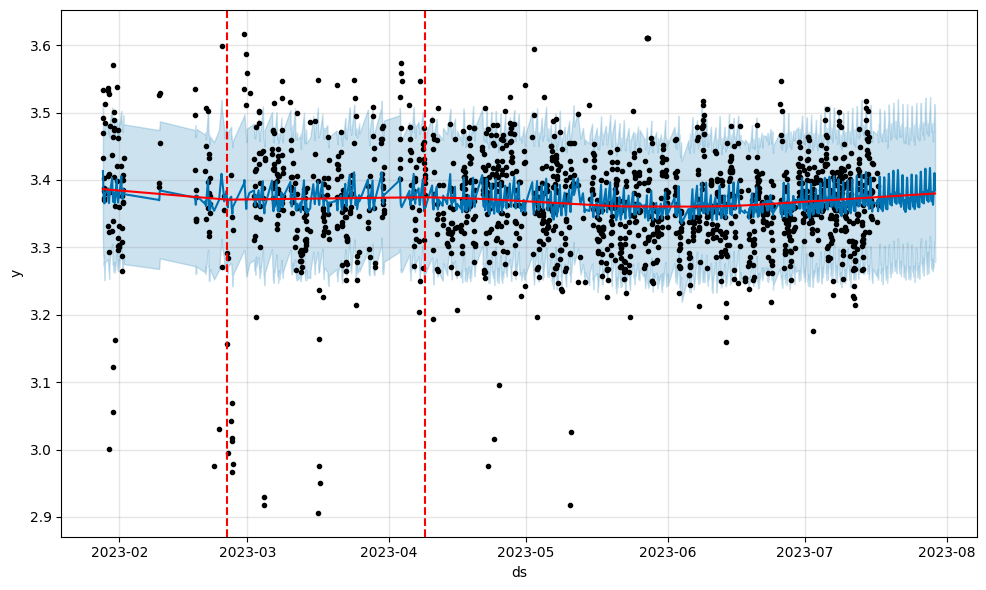

In [207]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

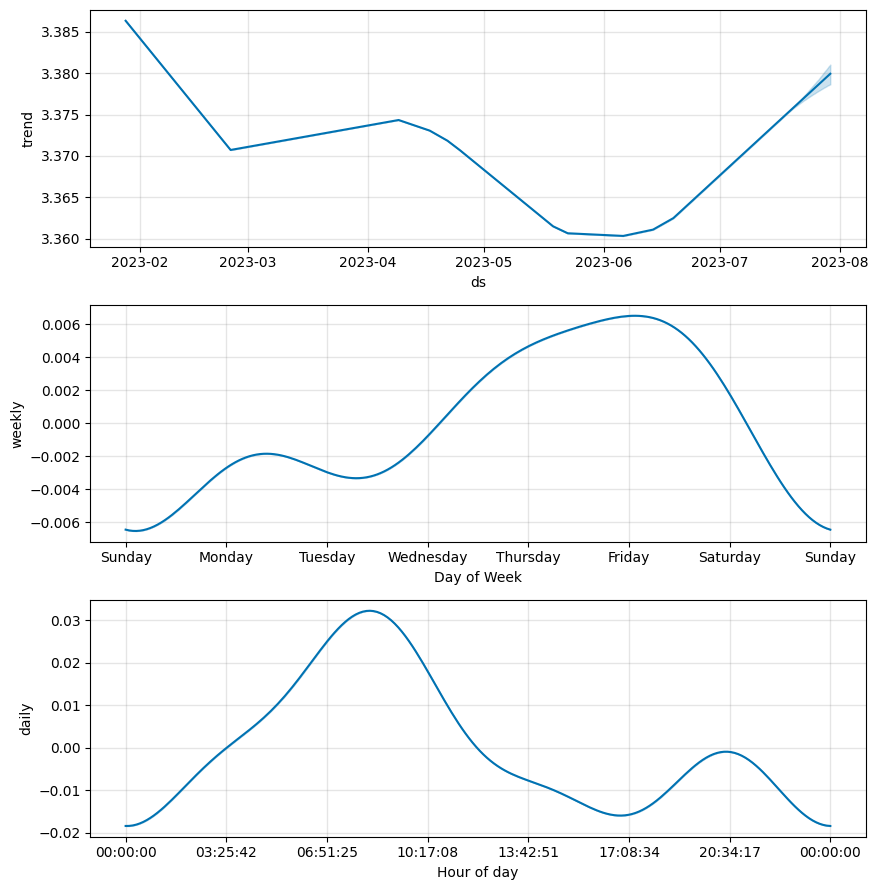

In [208]:
m3.plot_components(forecast);

In [96]:
from prophet.diagnostics import cross_validation

In [97]:
df_cv = cross_validation(
    m3,
    initial='300 hours',
    period='12 hours',
    horizon='24 hours')

INFO:prophet:Making 255 forecasts with cutoffs between 2023-02-16 20:10:14 and 2023-07-15 23:10:14


  0%|          | 0/255 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/lhz5h3hl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/mrrxl53z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84969', 'data', 'file=/tmp/tmpg_dlh9xh/lhz5h3hl.json', 'init=/tmp/tmpg_dlh9xh/mrrxl53z.json', 'output', 'file=/tmp/tmpg_dlh9xh/prophet_modeli0yhmgj6/prophet_model-20231026144556.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/7ocut61q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_dlh9xh/o85wpqai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [98]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-17 13:10:14,3.009758,2.895222,3.118163,3.414387,2023-02-16 20:10:14
1,2023-02-17 14:10:14,2.966610,2.852183,3.080029,3.534931,2023-02-16 20:10:14
2,2023-02-17 15:10:14,2.909525,2.794427,3.016363,3.496064,2023-02-16 20:10:14
3,2023-02-17 16:10:14,2.887079,2.770199,2.990984,3.374785,2023-02-16 20:10:14
4,2023-02-17 17:10:14,2.914491,2.801338,3.030390,3.342234,2023-02-16 20:10:14
...,...,...,...,...,...,...
2839,2023-07-16 19:10:14,3.368876,3.268449,3.468660,3.410190,2023-07-15 23:10:14
2840,2023-07-16 20:10:14,3.373568,3.275723,3.475047,3.337574,2023-07-15 23:10:14
2841,2023-07-16 21:10:14,3.372349,3.271502,3.480158,3.391564,2023-07-15 23:10:14
2842,2023-07-16 22:10:14,3.365738,3.274488,3.470731,3.365795,2023-07-15 23:10:14


In [99]:
from prophet.diagnostics import performance_metrics

In [100]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,0.008076,0.089869,0.063071,0.018776,0.013966,0.018781,0.893323
1,0 days 03:59:46,0.007648,0.087454,0.062871,0.018710,0.015074,0.018705,0.885107
2,0 days 04:00:00,0.008208,0.090599,0.065377,0.019611,0.015991,0.019514,0.877028
3,0 days 04:59:46,0.008135,0.090195,0.064909,0.019482,0.015982,0.019380,0.874666
4,0 days 05:00:00,0.008180,0.090442,0.066805,0.020035,0.016538,0.019952,0.875000
5,0 days 05:59:46,0.007510,0.086659,0.063960,0.019145,0.016311,0.019086,0.886183
6,0 days 06:00:00,0.007729,0.087917,0.063180,0.018957,0.015212,0.018878,0.890747
7,0 days 06:59:46,0.007493,0.086564,0.062403,0.018749,0.014900,0.018660,0.891058
8,0 days 07:00:00,0.006357,0.079730,0.059538,0.017829,0.014297,0.017775,0.896820
9,0 days 07:59:46,0.006552,0.080942,0.061035,0.018282,0.014545,0.018221,0.883400


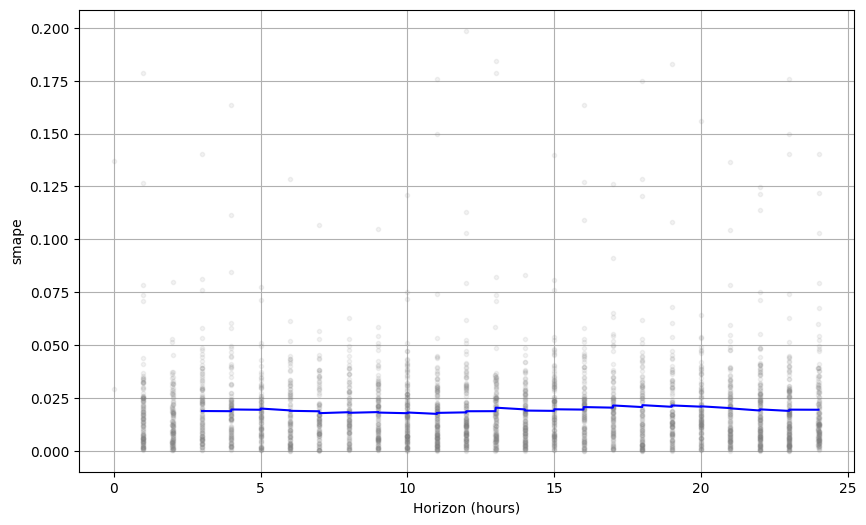

In [101]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [102]:
pm['smape'].mean()

0.019260102374494156

In [103]:
forecast['fact'] = logdf['y'].reset_index(drop = True)

In [104]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [105]:
df_cv.head(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-17 13:10:14,3.009758,2.895222,3.118163,3.414387,2023-02-16 20:10:14
1,2023-02-17 14:10:14,2.966610,2.852183,3.080029,3.534931,2023-02-16 20:10:14
2,2023-02-17 15:10:14,2.909525,2.794427,3.016363,3.496064,2023-02-16 20:10:14
3,2023-02-17 16:10:14,2.887079,2.770199,2.990984,3.374785,2023-02-16 20:10:14
4,2023-02-17 17:10:14,2.914491,2.801338,3.030390,3.342234,2023-02-16 20:10:14
5,2023-02-17 18:10:14,2.947682,2.830014,3.068466,3.339122,2023-02-16 20:10:14
6,2023-02-17 19:10:14,2.939946,2.820479,3.051106,3.384436,2023-02-16 20:10:14
7,2023-02-17 20:10:14,2.904490,2.796461,3.012749,3.342329,2023-02-16 20:10:14
8,2023-02-19 19:10:14,3.384010,3.262195,3.494500,3.413824,2023-02-18 19:10:14
9,2023-02-19 19:10:14,3.384010,3.269344,3.497318,3.413824,2023-02-19 07:10:14


In [115]:
forecast['fact'] = logdf['y'].reset_index(drop = True)

In [116]:
#forecast.to_csv('C1_PredictOutput_trend_test.csv')